In [1]:
from pymatgen.ext.matproj import MPRester
from pymatgen import Lattice,Structure,Molecule
from jupyter_jsmol.pymatgen import quick_view
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from jupyter_jsmol import JsmolView
from pymatgen.analysis.diffraction.xrd import XRDCalculator
from pymatgen.electronic_structure import bandstructure
from pymatgen.electronic_structure import plotter
from pymatgen.electronic_structure.plotter import BSPlotter
import numpy as np
import matplotlib.pyplot as plt
from pymatgen.phonon.bandstructure import *
from pymatgen.phonon.plotter import *

from jupyter_jsmol.pymatgen import quick_view

In [2]:
with MPRester("T8fAP9J6w3C63ALkqu8u") as m:
    struct = m.get_structure_by_material_id("mp-924129") #récupère les données du crystal sur MP 
    band_struct = m.get_bandstructure_by_material_id("mp-924129")#récupère les données sur la structure des bandes
    phonon_band = m.get_phonon_bandstructure_by_material_id("mp-924129") #recupère les données sur la strucuture de bande des phonons


/usr/local/lib64/python3.6/site-packages/pymatgen/phonon/bandstructure.py:455: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/usr/local/lib64/python3.6/site-packages/pymatgen/phonon/bandstructure.py:456: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



<module 'matplotlib.pyplot' from '/usr/local/lib64/python3.6/site-packages/matplotlib/pyplot.py'>

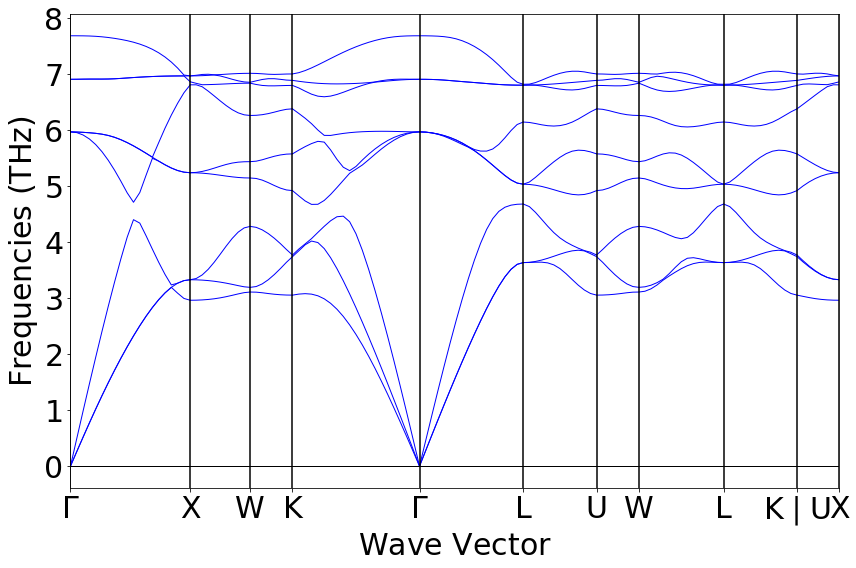

In [3]:
plotter = PhononBSPlotter(phonon_band)
plotter.get_plot()

In [4]:
data = plotter.bs_plot_data()#récupère les données
frequency = data['frequency']
distances = data['distances']

dx1 = distances[0][1]-distances[0][0]
dx2 = distances[3][-1]-distances[3][-2]
dx3 = distances[4][1] - distances[4][0]

dy1 = frequency[0][0][1] - frequency[0][0][0]
dy2 = frequency[3][1][-1] - frequency[3][1][-2]
dy3 = frequency[4][2][1] - frequency[4][2][0]

pente1 = dx1/dy1
pente2 = dx2/dy2
pente3 = dx3/dy3
#pente en THz/A^(-1)
#On doit donc convertir en hz(1e12) et en m(1e-10)

#la vitesse[m/s] se calcule donc 2*pi*1e12*1e10 par la relation pente = domega+dk et omega = 2*pi*f
v1 = pente1*2*np.pi*1e12*1e-10
v2 = np.abs(pente2*2*np.pi*1e12*1e-10)
v3 = pente3*2*np.pi*1e12*1e-10


print('la vitesse acoustique sur la branche 1, dans la direction Gamma-X vaut: {} m/s'.format(v1))
print('la vitesse acoustique sur la branche 2, dans la direction K-Gamma: {} m/s'.format(v2))
print('la vitesse acoustique sur la branche 3, dans la direction Gamma-L vaut: {} m/s'.format(v3))


la vitesse acoustique sur la branche 1, dans la direction Gamma-X vaut: 131.55880269884474 m/s
la vitesse acoustique sur la branche 2, dans la direction K-Gamma: 115.86784464810894 m/s
la vitesse acoustique sur la branche 3, dans la direction Gamma-L vaut: 73.42765453024508 m/s
